## Analysis of Coronavirus (COVID-19) Pandemic Data 

The purpose of the notebook is to evaluate the coronavirus (COVID-19) data provided by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU).  This workbook only evaluates the time series dataset provided by JHU-CSSE.

As of March 17, 2020 this notebook is still a work in progress.  Most disappointing is the updates from the JHU dataset for U.S. county reporting seem to have been discontinued. All the datasets from JHU seem to lag behind state reporting.

#### Data Source: 
CSSE-JHU COVID-19 data repository https://github.com/CSSEGISandData/COVID-19  

---

#### Python Libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import requests
import numpy as np
%matplotlib inline
import seaborn as sns

/Users/mark/anaconda3/envs/sandbox2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*** The warning message above is the result of the seaborn package needing to be updated.

In [2]:
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

#### Load csv data into dataframes

In [3]:
# confirmed cases data
confirm_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

# recovered cases data
recover_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

# death cases data
deaths_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

# create dataframes
confirm_df = pd.read_csv(confirm_url)
recover_df = pd.read_csv(recover_url)
deaths_df = pd.read_csv(deaths_url)


In [4]:
state_abbr_fips_df = pd.read_csv('state_abbr_fips.csv', header=None, dtype=object, names=['NAME','state_fips','state_abbr'])
state_abbr_fips_df

,NAME,state_fips,state_abbr
0,Alabama,01,AL
1,Alaska,02,AK
2,Arizona,04,AZ
3,Arkansas,05,AR
4,California,06,CA
5,Colorado,08,CO
6,Connecticut,09,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


#### Set dataframe window viewing size

In [5]:
pd.set_option('display.max_rows', 1000)

In [6]:
confirm_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,21,27,32,32,39,46,64,64,73,103
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,28,38,48,55,65,65,92,112,134,171
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,11,11,15,18,21,21,36,49,57,71
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,13,15,15,18,20,20,35,46,61,68
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,2,2,2,3,3,5,7,7,7


In [7]:
recover_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,33,34,34,35,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,76,76,101,118,118,118,118,118,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,96,96,97,105,105,109
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,23,24,24,24,26,26,26,35,42,42
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,7,7,7,7,7,7,8,8,8,8
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,10,10,15,16,19,22,22,27
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,4
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### US & Individual State dataframe setup

#### Create a dataframe without null values and does not contain state localities

In [9]:
confirm_US_df = confirm_df[~confirm_df['Province/State'].isnull()].copy()

confirm_US_df = confirm_US_df[~confirm_US_df['Province/State'].str.contains(',') & (confirm_US_df['Country/Region']=='US')].sort_values('Province/State').copy()

confirm_US_df = confirm_US_df.rename(columns={'Province/State': 'state'})
confirm_US_df_timeline = confirm_US_df.copy()
confirm_US_df_timeline.head()

,state,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
417,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,5,6,12,29
141,Alaska,US,61.3707,-152.4044,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
118,Arizona,US,33.7298,-111.4312,0,0,0,0,0,0,...,0,0,0,6,9,9,9,12,13,18
142,Arkansas,US,34.9697,-92.3731,0,0,0,0,0,0,...,0,0,0,0,1,6,6,12,16,22
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,144,177,221,282,340,426,557


#### Simplify the datafram containing the US confirmed cases

In [10]:
num_columns = len(confirm_US_df.columns)

confirm_US_df['confirmed'] = confirm_US_df[confirm_US_df.columns[4: num_columns]].max(axis=1).astype(int)
confirm_US_df = confirm_US_df[['state','Lat','Long','confirmed']].copy()
#sort descending by total count
confirm_US_df[['state','confirmed']].sort_values(by= ['confirmed'], ascending=False).style.hide_index()

state,confirmed
New York,967
Washington,904
California,557
Massachusetts,197
New Jersey,178
Colorado,160
Florida,155
Louisiana,136
Georgia,121
Illinois,105


In [11]:
confirm_US_df['confirmed'].sum()

4633

#### Create a dataframe without null values and does not contain state localities

In [12]:
recover_US_df = recover_df[~recover_df['Province/State'].isnull()].copy()

recover_US_df = recover_US_df[~recover_US_df['Province/State'].str.contains(',') & (recover_US_df['Country/Region']=='US')].sort_values('Province/State').copy()

recover_US_df = recover_US_df.rename(columns={'Province/State': 'state'})
recover_US_df_timeline = recover_US_df.copy()
recover_US_df_timeline.head()

,state,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
417,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,Alaska,US,61.3707,-152.4044,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,Arizona,US,33.7298,-111.4312,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
142,Arkansas,US,34.9697,-92.3731,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,2,2,6,6,6,6,6


#### Simplify the dataframe containing the US `recovered` cases

In [13]:
num_columns = len(recover_US_df.columns)

recover_US_df['recovered'] = recover_US_df[recover_US_df.columns[4: num_columns]].max(axis=1).astype(int)
recover_US_df = recover_US_df[['state','Lat','Long','recovered']].copy()
#sort descending by total count
recover_US_df[['state','recovered']].sort_values(by= ['recovered'], ascending=False).style.hide_index()

state,recovered
California,6
Maryland,3
Illinois,2
Arizona,1
Wisconsin,1
New Jersey,1
Washington,1
Kentucky,1
Massachusetts,1
Alabama,0


In [14]:
recover_US_df['recovered'].sum()

17

#### Create a dataframe without null values and does not contain state localities

In [15]:
deaths_US_df = deaths_df[~deaths_df['Province/State'].isnull()].copy()

deaths_US_df = deaths_US_df[~deaths_US_df['Province/State'].str.contains(',') & (deaths_US_df['Country/Region']=='US')].sort_values('Province/State').copy()

deaths_US_df = deaths_US_df.rename(columns={'Province/State': 'state'})
deaths_US_df_timeline = deaths_US_df.copy()
deaths_US_df_timeline.head()

,state,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
417,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,Alaska,US,61.3707,-152.4044,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,Arizona,US,33.7298,-111.4312,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,Arkansas,US,34.9697,-92.3731,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,2,3,4,4,5,6,7


#### Simplify the datafram containing the US `deaths` cases

In [16]:
num_columns = len(deaths_US_df.columns)

deaths_US_df['deaths'] = deaths_US_df[deaths_US_df.columns[4: num_columns]].max(axis=1).astype(int)
deaths_US_df = deaths_US_df[['state','Lat','Long','deaths']].copy()
#sort descending by total count
deaths_US_df[['state','deaths']].sort_values(by= ['deaths'], ascending=False).style.hide_index()

state,deaths
Washington,48
New York,10
California,7
Florida,5
Louisiana,3
New Jersey,2
South Carolina,1
South Dakota,1
Oregon,1
Kentucky,1


In [17]:
deaths_US_df['deaths'].sum()

85

In [18]:
states_df = pd.merge(confirm_US_df, recover_US_df, on='state')
#states_df

states_df = pd.merge(states_df, deaths_US_df, on='state')
states_df = states_df[['state','Lat','Long','confirmed','recovered','deaths']]
#states_df

#### Create a dataframe of current fips codes for counties and states

In [19]:
county_fips_url = 'https://api.census.gov/data/2010/dec/sf1?get=NAME&for=county:*'
state_fips_url = 'https://api.census.gov/data/2010/dec/sf1?get=NAME&for=state:*'

# create county with fips dataframe
r = requests.get(county_fips_url)
county_fips_df = pd.DataFrame(r.json())
#convert the first row to the header
new_header_county = county_fips_df.iloc[0] #grab the first row for the header
county_fips_df = county_fips_df[1:] #take the data less the header row
county_fips_df.columns = new_header_county #set the header row as the df header
print(len(county_fips_df))
# create state with fips dataframe
r = requests.get(state_fips_url)
state_fips_df = pd.DataFrame(r.json())
#convert the first row to the header
new_header_state = state_fips_df.iloc[0] #grab the first row for the header
state_fips_df = state_fips_df[1:] #take the data less the header row
state_fips_df.columns = new_header_state #set the header row as the df header
state_fips_df=pd.merge(state_fips_df, state_abbr_fips_df, on='NAME')
print(len(state_fips_df))


fips_df = pd.merge(county_fips_df, state_fips_df, on='state')

fips_df = fips_df.rename(columns={'NAME_x': 'full_county', 'county': 'county_fips'})

fips_df['county']=fips_df.full_county.str.split(",",expand=True)[0]

fips_df['county_short']=fips_df.county.str.split(" County",expand=True)[0]


fips_df=fips_df[['state_fips','county_fips','state','county','county_short','full_county','state_abbr']].sort_values(by=['state','county']).copy()
fips_df.reset_index(inplace = True,drop=True) 
print(len(fips_df))

fips_df


3221
51
3143


,state_fips,county_fips,state,county,county_short,full_county,state_abbr
0,01,001,01,Autauga County,Autauga,"Autauga County, Alabama",AL
1,01,003,01,Baldwin County,Baldwin,"Baldwin County, Alabama",AL
2,01,005,01,Barbour County,Barbour,"Barbour County, Alabama",AL
3,01,007,01,Bibb County,Bibb,"Bibb County, Alabama",AL
4,01,009,01,Blount County,Blount,"Blount County, Alabama",AL
...,...,...,...,...,...,...,...
3138,56,037,56,Sweetwater County,Sweetwater,"Sweetwater County, Wyoming",WY
3139,56,039,56,Teton County,Teton,"Teton County, Wyoming",WY
3140,56,041,56,Uinta County,Uinta,"Uinta County, Wyoming",WY
3141,56,043,56,Washakie County,Washakie,"Washakie County, Wyoming",WY


In [20]:
states_df = pd.merge(confirm_US_df, recover_US_df, how='left',left_on='state',right_on='state')
#states_df

states_df = pd.merge(states_df, deaths_US_df, how='left',left_on='state',right_on='state')
states_df = states_df[['state','Lat','Long','confirmed','recovered','deaths']]
print(len(states_df))
#states_df

56


In [21]:
states_df = pd.merge(states_df,state_fips_df, left_on='state', right_on='NAME')
states_df = states_df.rename(columns={'state_x': 'state'})
states_df = states_df[['state','state_fips','state_abbr','Lat','Long','confirmed','recovered','deaths']]
print(len(states_df))
states_df.sort_values(by='confirmed',ascending=False).head()

51


,state,state_fips,state_abbr,Lat,Long,confirmed,recovered,deaths
32,New York,36,NY,42.1657,-74.9481,967,0,10
47,Washington,53,WA,47.4009,-121.4905,904,1,48
4,California,06,CA,36.1162,-119.6816,557,6,7
21,Massachusetts,25,MA,42.2302,-71.5301,197,1,0
30,New Jersey,34,NJ,40.2989,-74.5210,178,1,2


In [22]:
confirm_counties_df = confirm_df[~confirm_df['Province/State'].isnull()].copy()
confirm_counties_df = confirm_counties_df[confirm_counties_df['Province/State'].str.contains(',') & (confirm_counties_df['Country/Region']=='US')].sort_values('Province/State').copy()
confirm_counties_df = confirm_counties_df.rename(columns={'Province/State': 'county_state'})
confirm_counties_df_timeline = confirm_counties_df.copy()
print(len(confirm_counties_df))
confirm_counties_df_timeline.head()

191


,county_state,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
242,"Adams, IN",US,39.8522,-77.2865,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,"Alachua, FL",US,29.7938,-82.4944,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,"Alameda County, CA",US,37.6017,-121.7195,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,0
384,"Anoka, MN",US,45.3293,-93.2197,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,"Arapahoe, CO",US,39.6203,-104.3326,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
num_columns = len(confirm_counties_df.columns)
confirm_counties_df['confirmed'] = confirm_counties_df[confirm_counties_df.columns[4: num_columns]].max(axis=1).astype(int)
confirm_counties_df=confirm_counties_df[['county_state','Lat','Long','confirmed']].copy()
split_county_state=confirm_counties_df.county_state.str.split(", ",expand=True)
confirm_counties_df['county']=split_county_state[0]
confirm_counties_df['state']=split_county_state[1]
confirm_counties_df=confirm_counties_df[['county_state','county','state','Lat','Long','confirmed']]
print(len(confirm_counties_df))

#confirm_counties_df.sort_values(by='confirmed',ascending=False)

191


In [24]:
recover_counties_df = recover_df[~recover_df['Province/State'].isnull()].copy()
recover_counties_df = recover_counties_df[recover_counties_df['Province/State'].str.contains(',') & (recover_counties_df['Country/Region']=='US')].sort_values('Province/State').copy()
recover_counties_df = recover_counties_df.rename(columns={'Province/State': 'county_state'})
recover_counties_df_timeline = recover_counties_df.copy()
print(len(recover_counties_df))

recover_counties_df_timeline.head()

191


,county_state,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
242,"Adams, IN",US,39.8522,-77.2865,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,"Alachua, FL",US,29.7938,-82.4944,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,"Alameda County, CA",US,37.6017,-121.7195,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,"Anoka, MN",US,45.3293,-93.2197,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,"Arapahoe, CO",US,39.6203,-104.3326,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
num_columns = len(recover_counties_df.columns)
recover_counties_df['recovered'] = recover_counties_df[recover_counties_df.columns[4: num_columns]].max(axis=1).astype(int)
recover_counties_df=recover_counties_df[['county_state','Lat','Long','recovered']].copy()
split_county_state=recover_counties_df.county_state.str.split(", ",expand=True)
recover_counties_df['county']=split_county_state[0]
recover_counties_df['state']=split_county_state[1]
recover_counties_df=recover_counties_df[['county_state','county','state','Lat','Long','recovered']]
print(len(recover_counties_df))

#recover_counties_df.sort_values(by='recovered',ascending=False)

191


In [26]:
deaths_counties_df = deaths_df[~deaths_df['Province/State'].isnull()].copy()
deaths_counties_df = deaths_counties_df[deaths_counties_df['Province/State'].str.contains(',') & (deaths_counties_df['Country/Region']=='US')].sort_values('Province/State').copy()
deaths_counties_df = deaths_counties_df.rename(columns={'Province/State': 'county_state'})
deaths_counties_df = deaths_counties_df.copy()
print(len(deaths_counties_df))

#deaths_counties_df.head()

191


In [27]:
num_columns = len(deaths_counties_df.columns)
deaths_counties_df['deaths'] = deaths_counties_df[deaths_counties_df.columns[4: num_columns]].max(axis=1).astype(int)
deaths_counties_df=deaths_counties_df[['county_state','Lat','Long','deaths']].copy()
split_county_state=deaths_counties_df.county_state.str.split(", ",expand=True)
deaths_counties_df['county']=split_county_state[0]
deaths_counties_df['state']=split_county_state[1]

deaths_counties_df=deaths_counties_df[['county_state','county','state','Lat','Long','deaths']]
print(len(deaths_counties_df))
#deaths_counties_df.sort_values(by='deaths',ascending=False)

191


In [28]:
counties_df = pd.merge(confirm_counties_df, recover_counties_df, how='left', on=['state','county'])
counties_df = pd.merge(counties_df, deaths_counties_df, on=['state','county'])
counties_df = counties_df[['county_state','county','state','Lat','Long','confirmed','recovered','deaths']]


counties_df['county_short']=counties_df.county.str.split(" County",expand=True)[0]
print(len(counties_df))

#counties_df

191


In [29]:
counties_df = pd.merge(counties_df,fips_df, how='left', left_on=['county_short','state'], right_on=['county_short','state_abbr'])
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
print(len(counties_df))
#counties_df

191


In [30]:
counties_df = counties_df.rename(columns={'state_x': 'state','county_x':'county'})
counties_df = counties_df[['county_state','county','state','state_fips','county_fips','county_short','full_county','Lat','Long','confirmed','recovered','deaths']]
counties_df = counties_df.sort_values(by=['confirmed','state_fips','county_fips'],ascending=False)

counties_df

,county_state,county,state,state_fips,county_fips,county_short,full_county,Lat,Long,confirmed,recovered,deaths
186,"Westchester County, NY",Westchester County,NY,36,119,Westchester,"Westchester County, New York",41.1220,-73.7949,98,0,0
83,"King County, WA",King County,WA,53,033,King,"King County, Washington",47.6062,-122.3321,83,1,17
149,"Santa Clara County, CA",Santa Clara County,CA,06,085,Santa Clara,"Santa Clara County, California",37.3541,-121.9552,38,1,0
156,"Snohomish County, WA",Snohomish County,WA,53,061,Snohomish,"Snohomish County, Washington",48.0330,-121.8339,31,0,1
115,"New York County, NY",New York County,NY,36,061,New York,"New York County, New York",40.7128,-74.0060,19,0,0
112,"Nassau County, NY",Nassau County,NY,36,059,Nassau,"Nassau County, New York",40.6546,-73.5594,17,0,0
93,"Los Angeles, CA",Los Angeles,CA,06,037,Los Angeles,"Los Angeles County, California",34.0522,-118.2437,14,0,0
146,"San Francisco County, CA",San Francisco County,CA,06,075,San Francisco,"San Francisco County, California",37.7749,-122.4194,9,0,0
31,"Contra Costa County, CA",Contra Costa County,CA,06,013,Contra Costa,"Contra Costa County, California",37.8534,-121.9018,9,0,0
180,"Washington County, OR",Washington County,OR,41,067,Washington,"Washington County, Oregon",45.5470,-123.1386,8,0,0


In [31]:
counties_df[counties_df.state=='NY']

,county_state,county,state,state_fips,county_fips,county_short,full_county,Lat,Long,confirmed,recovered,deaths
186,"Westchester County, NY",Westchester County,NY,36,119,Westchester,"Westchester County, New York",41.1220,-73.7949,98,0,0
115,"New York County, NY",New York County,NY,36,061,New York,"New York County, New York",40.7128,-74.0060,19,0,0
112,"Nassau County, NY",Nassau County,NY,36,059,Nassau,"Nassau County, New York",40.6546,-73.5594,17,0,0
142,"Rockland County, NY",Rockland County,NY,36,087,Rockland,"Rockland County, New York",41.1489,-73.9830,4,0,0
152,"Saratoga County, NY",Saratoga County,NY,36,091,Saratoga,"Saratoga County, New York",43.0324,-73.9360,2,0,0
174,"Ulster County, NY",Ulster County,NY,36,111,Ulster,"Ulster County, New York",41.8586,-74.3118,1,0,0
167,"Suffolk County, NY",Suffolk County,NY,36,103,Suffolk,"Suffolk County, New York",40.9849,-72.6151,1,0,0


In [32]:
counties_df[counties_df.state=='KY']

,county_state,county,state,state_fips,county_fips,county_short,full_county,Lat,Long,confirmed,recovered,deaths
65,"Harrison County, KY",Harrison County,KY,21,097,Harrison,"Harrison County, Kentucky",38.4333,-84.3542,2,0,0
74,"Jefferson County, KY",Jefferson County,KY,21,111,Jefferson,"Jefferson County, Kentucky",38.1938,-85.6435,1,0,0
51,"Fayette County, KY",Fayette County,KY,21,067,Fayette,"Fayette County, Kentucky",38.0606,-84.4803,1,0,0


In [33]:
states_df_plot=states_df[['state','confirmed']].sort_values(by=['confirmed'],ascending=False).copy().head(10)

states_df_plot.reset_index(drop=True, inplace=True)
states_df_plot.head()

,state,confirmed
0,New York,967
1,Washington,904
2,California,557
3,Massachusetts,197
4,New Jersey,178


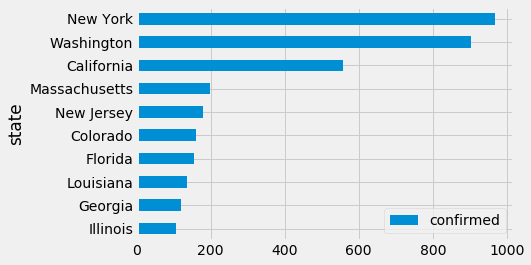

In [34]:
states_df_plot=states_df_plot.set_index('state').copy()
states_df_plot[['confirmed']].head(10).plot(kind='barh').invert_yaxis()

In [35]:
states_df_plot

,confirmed
state,
New York,967
Washington,904
California,557
Massachusetts,197
New Jersey,178
Colorado,160
Florida,155
Louisiana,136
Georgia,121


In [36]:
states_df_plot.columns

Index(['confirmed'], dtype='object')

In [37]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [38]:
fig = plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 15


<Figure size 1440x1440 with 0 Axes>

/Users/mark/anaconda3/envs/sandbox2/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


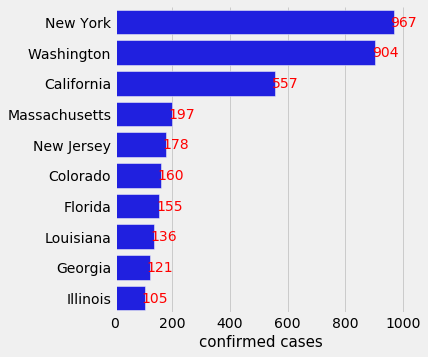

In [39]:
states_df_plot2=sns.catplot(x=list(states_df_plot.confirmed),y=list(states_df_plot.index),kind='bar',data=states_df_plot,edgecolor='whitesmoke',linewidth=.5,color='blue')
states_df_plot2.set(xlabel='confirmed cases',ylabel='')
for bar_index, bar_attributes in enumerate(states_df_plot2.ax.patches):
    bar_width = bar_attributes.get_width() # x coordinate of text
    states_df_plot2.ax.text(
        bar_width+35, bar_index, '{}'.format(int(bar_width)),
        ha='center', va='center',size=14, color='red')
plt.show;
